In [1]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

# Insertion sort

In [2]:
def insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]
            i = i - 1
        A[i + 1] = key
    return A

# Insertion sort para a contagem RAM

In [3]:
def insertion_sort_ram(A):
    qnt_operacoes = 0
    for j in range(1, len(A)): # 3
        qnt_operacoes = qnt_operacoes + 3
        key = A[j] # 2
        qnt_operacoes = qnt_operacoes + 2
        i = j - 1 # 2
        qnt_operacoes = qnt_operacoes + 2
        while i >= 0 and A[i] > key: # 3
            qnt_operacoes = qnt_operacoes + 3
            A[i + 1] = A[i]  # 3
            qnt_operacoes = qnt_operacoes + 3
            i -= 1 # 2
            qnt_operacoes = qnt_operacoes + 2

        A[i + 1] = key #2
        qnt_operacoes = qnt_operacoes + 2
        
    return A, qnt_operacoes

# Resolução: questão 2

In [4]:
def measure_real_time(arr):
    start_time = time.time()
    insertion_sort(arr)
    end_time = time.time()
    return end_time - start_time

In [5]:
np.random.seed(42)

In [6]:
sizes = [500, 1000, 1500, 2500, 5000, 10000, 15000, 16000, 18000 ]
real_times = []
ram_operations = []

In [8]:
for size in sizes:
    arr = np.random.randint(0, 100, size).tolist()
    
    real_time = measure_real_time(arr.copy())
    real_times.append(real_time)
    
    _, operations = insertion_sort_ram(arr.copy())
    ram_operations.append(operations)

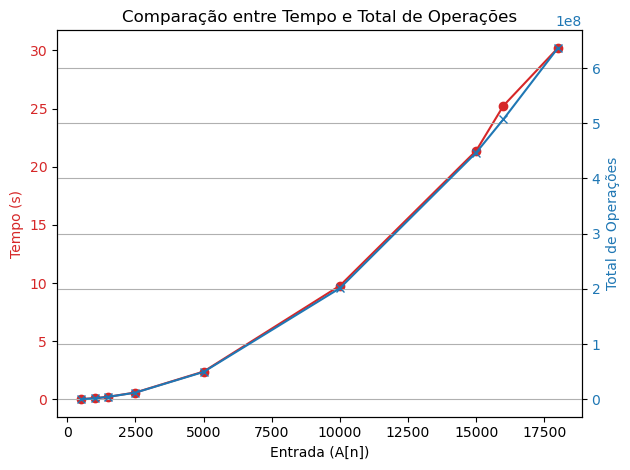

In [9]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Entrada (A[n])')
ax1.set_ylabel('Tempo (s)', color='tab:red')
ax1.plot(sizes, real_times, color='tab:red', label='Tempo (s)', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Total de Operações', color='tab:blue')
ax2.plot(sizes, ram_operations, color='tab:blue', label='Total de Operações',  marker='x')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Comparação entre Tempo e Total de Operações')
fig.tight_layout()
plt.grid(True)

plt.show()